In [74]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [75]:
# Load is the study data files

mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how = 'left', on = ['Mouse ID'])

# Display the data table for preview
mouse_study.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [76]:
# Checking the number of mice.
mouse_count = len(mouse_study["Mouse ID"].unique())
mouse_count

249

In [77]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df =  mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_study[mouse_study['Mouse ID'].isin(df)== False]
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Summary Statistics

In [78]:
# Summary statistics table

grouped_df = mouse_study.set_index('Drug Regimen').groupby(['Drug Regimen'])

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = grouped_df["Tumor Volume (mm3)"].mean().round(3)
median = grouped_df["Tumor Volume (mm3)"].median().round(3)
variance = grouped_df["Tumor Volume (mm3)"].var().round(3)
std = grouped_df["Tumor Volume (mm3)"].std().round(3)
sem = grouped_df["Tumor Volume (mm3)"].sem().round(3)


tumor_summary = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem,
       
})

tumor_summary.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596


In [79]:
# Summary statistics table for tumor volume by regimen

summary_table = grouped_df.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_table.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

# Bar and Pie Charts

In [80]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Create a bar chart based off of the group series from before
drug_group = mouse_study.groupby('Drug Regimen')

# Count of drugs in groups
count_mice = drug_group['Drug Regimen'].count()

count_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [81]:
regimen1 = mouse_study["Drug Regimen"].value_counts()
regimen1

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

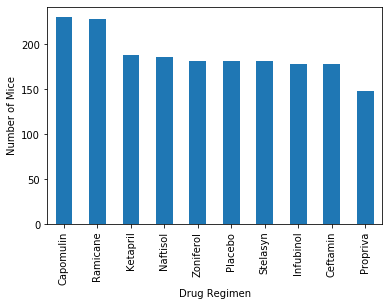

<Figure size 432x288 with 0 Axes>

In [82]:
regimen_count = regimen1.plot(kind='bar')

# Set the xlabel and ylabel using class methods

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')


plt.show()
plt.tight_layout()

In [83]:
drug_count =  mouse_study["Drug Regimen"].unique()
drug_count

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

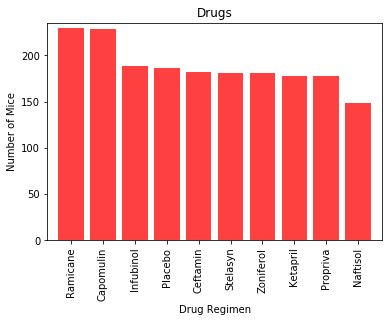

In [84]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drugs = drug_count
mice = hope_this_works

x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(mice) + 5)

plt.bar(x_axis, mice, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation= 90)
plt.show()

In [85]:
sex_group = mouse_study.groupby('Sex')
sex_group

count_sex = sex_group['Sex'].count()

count_sex

Sex
Female    922
Male      958
Name: Sex, dtype: int64

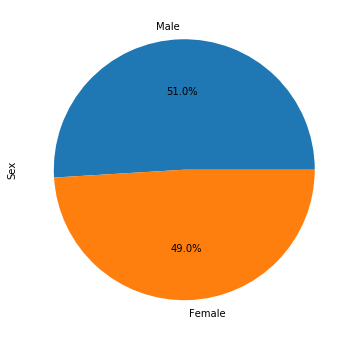

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_sex1 = mouse_study['Sex'].value_counts()

count_sex1

# Labels for the sections of our pie chart
sex_plot = count_sex1.plot(kind='pie', subplots=True, figsize=(11, 6), autopct='%1.1f%%')

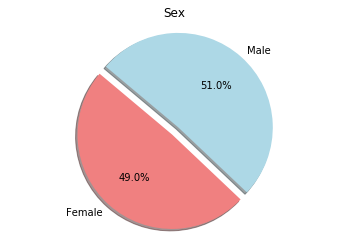

In [87]:
labels = ["Female", "Male"]

# The values of each section of the pie chart
count = [922, 958]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightblue"]

# Seperate sections 
explode = (0.1, 0)

plt.title("Sex")
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(count, explode=explode, labels= labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen

plt.show()

# Quartiles, Outliers, and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [89]:
#Code for instructor
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = mouse_study.loc[mouse_study["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


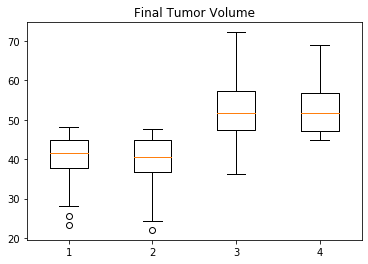

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.boxplot(tumor_vol_list)
plt.show()

# Line Graph and Scatter Plot

In [91]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = mouse_study.loc[mouse_study["Drug Regimen"] == 'Capomulin', 'Mouse ID']
#capomulin_mouse

capomulin_volume = mouse_study.loc[mouse_study["Mouse ID"] == 'r157', ['Tumor Volume (mm3)', "Timepoint"]].round(3)
capomulin_volume

,Tumor Volume (mm3),Timepoint
1452,45.000,0
1453,45.597,5
1454,46.060,10
1455,46.539,15


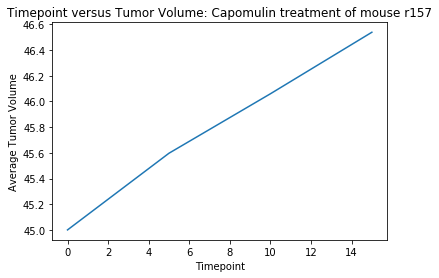

In [92]:
x_axis = capomulin_volume["Tumor Volume (mm3)"]
y_axis = capomulin_volume["Timepoint"]
plt.xlabel('Timepoint')
plt.ylabel('Average Tumor Volume')
plt.title("Timepoint versus Tumor Volume: Capomulin treatment of mouse r157")

# Plot the line
plt.plot(y_axis, x_axis)
plt.show()

In [93]:
weight = mouse_study.loc[mouse_study["Drug Regimen"] == 'Capomulin', ['Weight (g)', "Tumor Volume (mm3)", "Mouse ID"]]
mean_1 = weight.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight_1 = weight.groupby("Mouse ID")["Weight (g)"].max()

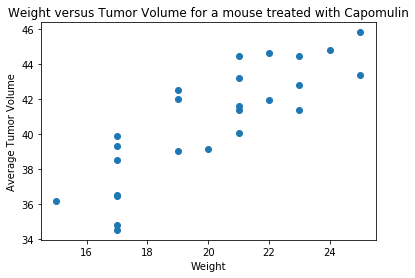

In [94]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.title("Weight versus Tumor Volume for a mouse treated with Capomulin")
x_values = weight_1
y_values = mean_1
plt.scatter(x_values,y_values)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

# Correlation and Regression

The correlation between both factors is 0.84


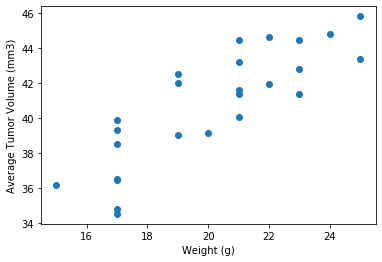

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
ccorrelation = st.pearsonr(weight_1,mean_1)
plt.scatter(weight_1,mean_1)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()